In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('USvideos.csv', sep=',')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
df = df.drop(columns=['publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
                     'description'])
df.head()

,video_id,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,748374,57527,2966,15954
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2418783,97185,6146,12703
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146033,5339,8181
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,343168,10172,666,2146
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2095731,132235,1989,17518


In [4]:
df.dtypes

video_id         object
trending_date    object
title            object
channel_title    object
category_id       int64
views             int64
likes             int64
dislikes          int64
comment_count     int64
dtype: object

In [5]:
filtro = df.category_id.isnull()
df.loc[filtro]

,video_id,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count


In [6]:
df['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
43      57
29      57
Name: category_id, dtype: int64

In [7]:
df_category = df['category_id'].value_counts().to_frame()
df_category

,category_id
24,9964
10,6472
26,4146
23,3457
22,3210
25,2487
28,2401
1,2345
17,2174
27,1656


In [8]:
df_category = df_category.assign(category_type = ['Entertainment', 'Music', 'Howto & Style', 'Comedy', 'People & Blogs', 'News & Politics', 'Science & Technology',
                  'Film & Animation', 'Sports', 'Education', 'Pets & Animals', 'Gaming', 'Travel & Events', 'Autos & Vehicles', 'Shows', 'Nonprofits & Activism'])
df_category.head()

,category_id,category_type
24,9964,Entertainment
10,6472,Music
26,4146,Howto & Style
23,3457,Comedy
22,3210,People & Blogs


In [9]:
df_category = df_category.rename(columns={'category_id': 'category_count'})
df_category.head()

,category_count,category_type
24,9964,Entertainment
10,6472,Music
26,4146,Howto & Style
23,3457,Comedy
22,3210,People & Blogs


In [10]:
df_category.reset_index(drop=True, inplace=True)
df_category.head()

,category_count,category_type
0,9964,Entertainment
1,6472,Music
2,4146,Howto & Style
3,3457,Comedy
4,3210,People & Blogs


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_category.tail()

,category_count,category_type
11,817,Gaming
12,402,Travel & Events
13,384,Autos & Vehicles
14,57,Shows
15,57,Nonprofits & Activism


In [21]:
filt = df_category.category_count > 2000
df_category = df_category.loc[filt]
df_category.tail()

,category_count,category_type
4,3210,People & Blogs
5,2487,News & Politics
6,2401,Science & Technology
7,2345,Film & Animation
8,2174,Sports


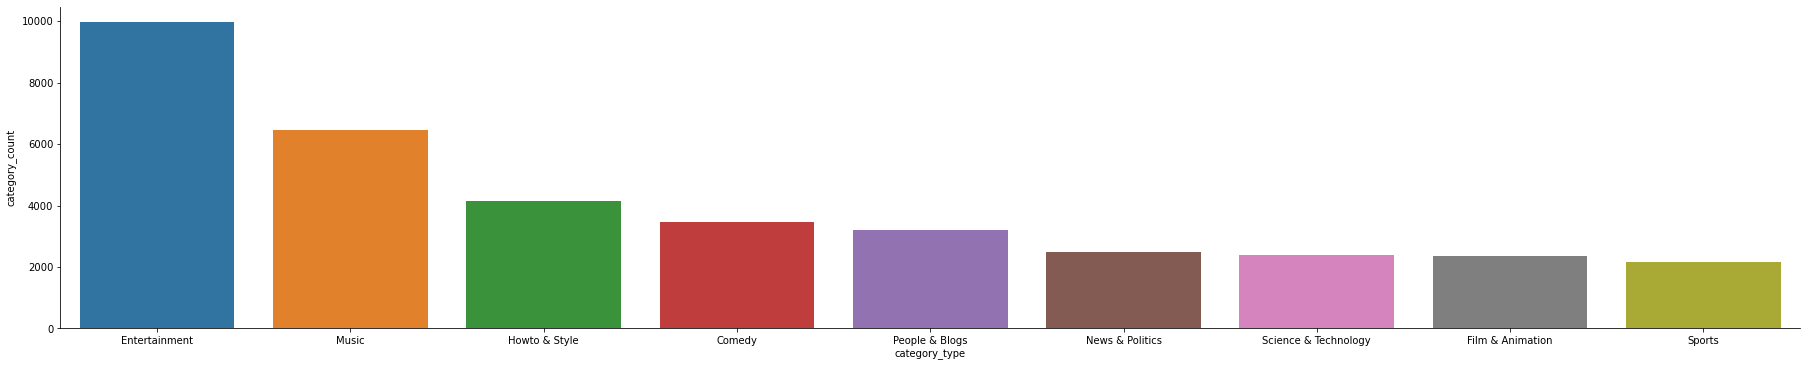

In [22]:
sns.catplot(x='category_type', y='category_count', kind ='bar', data=df_category, aspect= 5)

Podemos analisar com os dados do dataframe que o gênero mais presente no Youtube dos Estados Unidos na época de 2017 é o de Entretenimento geral, sendo seguido por Música - já que o Youtube é o site que comporta videos musicais da maioria dos artistas.

Os dados do ID foram pegos do arquivo JSON, onde especifica qual gênero é cada ID.